# Data Science z Python 3.10. Optymalizator, funkcja straty i early stopping
## 🇬🇧 Data Science with Python 3.10. Optimizer, loss function and early stopping
#### 👨‍🏫 PhD Wojciech Oronowicz-Jaśkowiak
#### 🤖 https://github.com/aipogodzinach

Poniżej przedstawiony jest kod znany z poprzednich zajęć. Tym razem wprowadzimy do niego "ulepszenia" i zastanowimy się nad właściwym optymalizatorem i funkcją straty. Wprowadzimy również do naszego modelu podstawowy Early Stopping, który będzie zapobiegać przeuczeniu się naszego modelu.

### 1. Import bibliotek
#### 🇬🇧 Import libraries
W tym miejscu importujemy biblioteki, które będą nam potrzebne do wytrenowania sieci neuronowej. Jeżeli w tym miejscu widoczny będzie błąd, to konieczne jest zainstalowanie biblioteki w danym środowisku. W takim wypadku wchodzimy w terminal, aktywujemy środowisko pracy, instalujemy biblioteki (pip install X).

In [1]:
import tensorflow as tf
import numpy as np
import mnist

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical

from tensorflow import keras
from tensorflow.keras import backend as K

import matplotlib.pyplot as plt

# Rozpoczynamy od importu potrzebnych nam bibliotek, nowością jest EarlyStopping

### 2. Przygotowanie danych do analizy
#### 🇬🇧 Data preparation

In [2]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()



train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Zatrzymajmy się na chwilę w tym miejscu. Na ostatnich zajęciach modyfikowaliśmy architekturę sieci neuronowej. Teraz przyszedł czas na wybór odpowiedniego optymalizatora, metryk oraz funkcji straty.

In [8]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

### 3. Trenowanie modelu
#### 🇬🇧 Model training

In [9]:
#1
f1 = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode="auto")

#2
f2 = ModelCheckpoint(filepath = 'model.h5',monitor='val_loss', mode='min', verbose=1, save_best_only=True)

#3
history = model.fit(train_images, train_labels, validation_data = (test_images, test_labels), callbacks = [f1,f2], verbose=1, epochs=100)

#4
trained_model = load_model('model.h5')

#5
train_accuracy = trained_model.evaluate(train_images, train_labels)

#6
test_accuracy = trained_model.evaluate(test_images, test_labels)

#7
print(train_accuracy + test_accuracy)

Epoch 1/100
1857/1875 [============================>.] - ETA: 0s - loss: 0.3537 - accuracy: 0.8948
Epoch 00001: val_loss improved from inf to 0.19627, saving model to model.h5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3528 - accuracy: 0.8951 - val_loss: 0.1963 - val_accuracy: 0.9397
Epoch 2/100
1866/1875 [============================>.] - ETA: 0s - loss: 0.1806 - accuracy: 0.9458
Epoch 00002: val_loss improved from 0.19627 to 0.16104, saving model to model.h5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1804 - accuracy: 0.9458 - val_loss: 0.1610 - val_accuracy: 0.9503
Epoch 3/100
1873/1875 [============================>.] - ETA: 0s - loss: 0.1388 - accuracy: 0.9577
Epoch 00003: val_loss improved from 0.16104 to 0.12592, saving model to model.h5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1388 - accuracy: 0.9577 - val_loss: 0.1259 - val_accuracy: 0.9615
Epoch 4/100
1859/1875 [============================>.] - ETA: 0s 

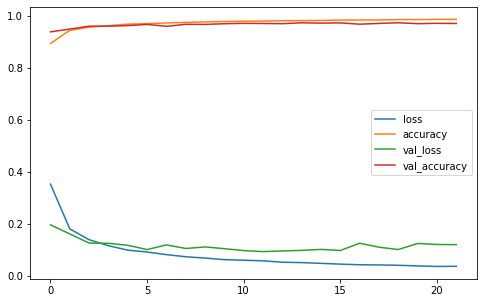

In [16]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

### 📚 Zadanie 1.
##### Przeprowadź proces uczenia się z wykorzystaniem early stopping, wykonaj poniższe kroki.

1. Stwórz nową zmienną, którą nazwiesz f1, odwołaj się do early stopping, wprowadź odpowiednie wartości do parametrów takich jak monitor, mode, verbose oraz patience.
2. Stwórz nową zmienną, którą nazwiesz f1, odwołaj się do ModelCheckpoint, wprowadź nazwę dla swojego modelu oraz odpowiednie wartości dla parametru monitor, mode, verbose oraz save_best_only.
3. Stwórz nową zmienną, którą nazwiesz history. Zmienna ta powinna zawierać stworzone w poprzednim kroku dane treningowe (x), etykiety danych trningowych (y), dane testowe (a), etykiedy danych testowych (b) oraz odpowiednie wartości parametrów epochs oraz verbose.
4. Stwórz nową zmienną, którą nazwiesz trained_model, załaduj model używając nazwy modelu z punktu drugiego.
5. Stwórz nową zmienną, którą nazwiesz trai _accuracy, odwołaj się do trained_model.evaluate, użyj danych treningowych (x) oraz etykiet danych treningowych (y).
6. Stwórz nową zmienną, którą nazwiesz test_accuracy, odwołaj się do trained_model.evaluate, użyj danych testowych (a) oraz etykiet danych testowych (b).
7. Przeprowadź uczenie sieci dla liczby epok wynoszącej 100 przy wartości parametru patience wynoszącej 10. Po której epoce proces trenowania sieci się zatrzyma?
8. Wyświetl informacje dotyczące dokładności klasyfikacji na materiale treningowym oraz testowym.

### 📚 Zadanie 2.
##### Uruchom ponownie proces treningu sieci, tym razem wprowadzając zmianę związaną z funkcją straty oraz optymalizatora.

1. Wypróbuj inną funkcję straty (rozkład Poisona). Czy w przypadku naszego zbioru danych taka funkcja ma sens?
2. Wypróbuj inny optymalizator (z wykorzystaniem algorytmu Adadelta). Czy obserwujesz jakieś zmiany w procesie uczenia się w porównaniu do algorytmu wykorzystanego w tutorialu (adam)? Gdzie może leżeć przyczyna tych różnic? (zob. https://keras.io/api/optimizers/adadelta).

In [21]:
##Podpunkt 1

model.compile(
  optimizer='adam',
  loss='Poisson',
  metrics=['accuracy'],
)

#1
f1 = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode="auto")

#2
f2 = ModelCheckpoint(filepath = 'model.h5',monitor='val_loss', mode='min', verbose=1, save_best_only=True)

#3
history = model.fit(train_images, train_labels, validation_data = (test_images, test_labels), callbacks = [f1,f2], verbose=1, epochs=100)

#4
trained_model = load_model('model.h5')

#5
train_accuracy = trained_model.evaluate(train_images, train_labels)

#6
test_accuracy = trained_model.evaluate(test_images, test_labels)

#7
print(train_accuracy + test_accuracy)


Epoch 1/100
1872/1875 [============================>.] - ETA: 0s - loss: 0.1026 - accuracy: 0.9913
Epoch 00001: val_loss improved from inf to 0.11587, saving model to model.h5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1026 - accuracy: 0.9913 - val_loss: 0.1159 - val_accuracy: 0.9721
Epoch 2/100
1860/1875 [============================>.] - ETA: 0s - loss: 0.1025 - accuracy: 0.9916
Epoch 00002: val_loss improved from 0.11587 to 0.11357, saving model to model.h5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1025 - accuracy: 0.9916 - val_loss: 0.1136 - val_accuracy: 0.9716
Epoch 3/100
1855/1875 [============================>.] - ETA: 0s - loss: 0.1026 - accuracy: 0.9911
Epoch 00003: val_loss did not improve from 0.11357
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1027 - accuracy: 0.9909 - val_loss: 0.1165 - val_accuracy: 0.9666
Epoch 4/100
1871/1875 [============================>.] - ETA: 0s - loss: 0.1021 - accuracy: 0.9

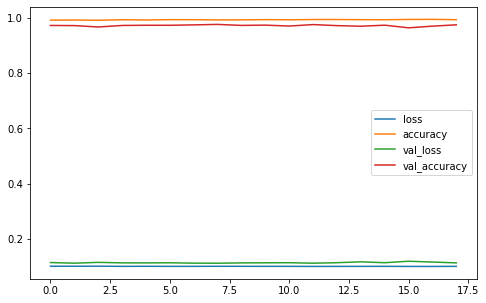

In [22]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

#Odpowiedź:

Funkcja bazując na procesie uczenia nie do końca się do niego nadaje. Zdecydowanie lepiej nadaje się do modeli regresji. Tutaj to widać, że po drugiej epoce parametry nie ulegają żadnej poprawie i strata jest stosunkowo duża w porównaniu do pierwotnego modelu.

In [23]:
##Podpunkt 2

model.compile(
  optimizer='adadelta',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

#1
f1 = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode="auto")

#2
f2 = ModelCheckpoint(filepath = 'model.h5',monitor='val_loss', mode='min', verbose=1, save_best_only=True)

#3
history = model.fit(train_images, train_labels, validation_data = (test_images, test_labels), callbacks = [f1,f2], verbose=1, epochs=100)

#4
trained_model = load_model('model.h5')

#5
train_accuracy = trained_model.evaluate(train_images, train_labels)

#6
test_accuracy = trained_model.evaluate(test_images, test_labels)

#7
print(train_accuracy + test_accuracy)

Epoch 1/100
1860/1875 [============================>.] - ETA: 0s - loss: 0.0082 - accuracy: 0.9971
Epoch 00001: val_loss improved from inf to 0.15458, saving model to model.h5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0084 - accuracy: 0.9971 - val_loss: 0.1546 - val_accuracy: 0.9746
Epoch 2/100
1857/1875 [============================>.] - ETA: 0s - loss: 0.0081 - accuracy: 0.9971
Epoch 00002: val_loss improved from 0.15458 to 0.15407, saving model to model.h5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0081 - accuracy: 0.9971 - val_loss: 0.1541 - val_accuracy: 0.9748
Epoch 3/100
1862/1875 [============================>.] - ETA: 0s - loss: 0.0078 - accuracy: 0.9972
Epoch 00003: val_loss improved from 0.15407 to 0.15358, saving model to model.h5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0079 - accuracy: 0.9971 - val_loss: 0.1536 - val_accuracy: 0.9749
Epoch 4/100
1858/1875 [============================>.] - ETA: 0s 

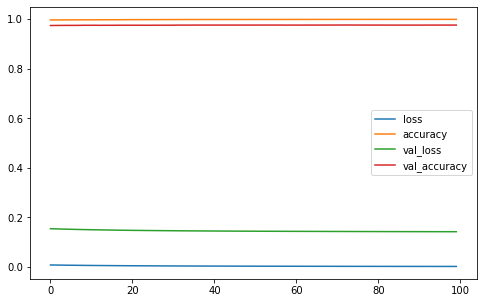

In [24]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

#Odpowiedź:

Model już po dwóch pierwszych epokach osiąga bardzo wysokie accuracy co pokazuje doskonale wykres. Jeżeli chodzi o loss to wygląda to analogicznie po pierwszych kilku epokach osiąga bardzo niskie wartości. Różnica w tym, że ten model osiąga wysokie accuracy po pierwszych kilku epokach może być zasługą wysokiego learning rate w przypadku algorytmu adadata.




### 📚 Zadanie 3.
##### Niekiedy przydaje nam się możliwość wprowadzenia modyfikacji do funkcji straty lub zbudowania własnej funkcji straty od postaw. W Keras/Tensorflow jest to dosyć prosta rzecz, którą możemy zrealizować za pomocą podstawowych operacji.

Poniższy przykład ilustruje w jaki sposób możemy skorzystać z funkcji straty Root Mean Square Error (RMSE) dla dwóch zmiennych (y_true i y_pred).

In [5]:
y_true = 43.2
y_pred = 4.2

In [6]:
x = tf.keras.metrics.RootMeanSquaredError()
x(y_true, y_pred).numpy()

39.0

Czasami jednak możemy chcieć stworzyć naszą własną funkcję straty (podajemy przy tym dwa argumenty, tj. y_true oraz y_pred).

Odtwórz wskazaną wcześniej funkcję straty Root Mean Squared Error tworząc od podstaw nową funkcję.

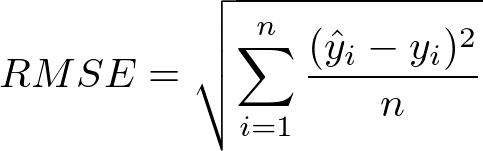

In [7]:
def custom_loss_function(y_true, y_pred):
    MSE = np.square(y_true - y_pred).mean()
    return np.sqrt(MSE)

loss = custom_loss_function(y_true, y_pred)
print('RMSE: {}'.format(loss))

RMSE: 39.0
